# Create an interactive plot of the Global Yearly Mean Anomaly of a CMIP6 variable

We will show how to combine, analyse and quickly plot data of the Coupled Model Intercomparison Project [CMIP6](https://pcmdi.llnl.gov/CMIP6/). We will choose one variable of multiple experiments and compare the results of different models. In particular, we analyse the historical experiment in combination with one of the shared socioeconomic pathway (ssp) experiments. 

This Jupyter notebook is meant to run in the [Jupyterhub](https://jupyterhub.dkrz.de/hub/login?next=%2Fhub%2Fhome) server of the German Climate Computing Center [DKRZ](https://www.dkrz.de/). The DKRZ hosts the CMIP data pool including 4 petabytes of CMIP6 data. Please, choose the Python 3 unstable kernel on the Kernel tab above, it contains all the common geoscience packages. See more information on how to run Jupyter notebooks at DKRZ [here](https://www.dkrz.de/up/systems/mistral/programming/jupyter-notebook).

Running this Jupyter notebook in your premise, which is also known as [client-side](https://en.wikipedia.org/wiki/Client-side) computing, will require that you install the necessary packages and download data.

Thanks to the data and computer scientists Marco Kulüke, Fabian Wachsmann, Maria Moreno, and Stephan Kindermann at DKRZ for their contribution to this notebook.

### Learning Objectives

- How to access a dataset from the DKRZ CMIP data pool with `intake-esm`
- How to calculate global field means and yearly means with `xarray` and `numpy`
- How to visualize the results with `hvplot`

### Software to be used

- [Intake](https://github.com/intake/intake) for finding the data in the catalog of the DKRZ pool
- [Xarray](http://xarray.pydata.org/en/stable/) for loading and processing the data
- [hvPlot](https://hvplot.holoviz.org/index.html) for visualizing the data in the Jupyter notebook and save the plots in your local computer

In [1]:
import intake
import pandas as pd
import hvplot.pandas
import numpy as np
import xarray as xr

First, we need to set the `variable_id` which we like to plot. This is a selection of the most often analysed variables:

- `tas` is *Near-surface Air Temperature*
- `pr` is *Precipitation*
- `psl` is *Sea level pressure*
- `tasmax` is *Near-surface Maximum Air Temperature*
- `tasmin` is *Near-surface Minimum Air Temperature*
- `clt` is *Total Cloud Cover Percentage*

Choose the variable:

In [2]:
# Choose one of
# pr, psl, tas, tasmax, tasmin, clt
variable_id = "tas"

In [ ]:
# get formating done automatically according to style `black`
#%load_ext lab_black

The `intake-esm` software reads *Catalogs* which we use to **find, access and load** the data we are interested in. Daily updated CMIP6 catalogs are provided in DKRZ's cloud [swift](https://swiftbrowser.dkrz.de/public/dkrz_a44962e3ba914c309a7421573a6949a6/intake-esm/).

Similar to the shopping catalog at your favorite online bookstore, the intake catalog contains information (e.g. model, variables, and time range) about each dataset (the title, author, and number of pages of the book, for instance) that you can access before loading the data. It means that thanks to the catalog, you can find out where the book is just by using some keywords and you do not need to hold it in your hand to know the number of pages.

We specify the catalog descriptor for the intake package. The catalog descriptor is created by the DKRZ developers that manage the catalog, you do not need to care so much about it, knowing where it is and loading it is enough:

In [3]:
#col_url = "https://swift.dkrz.de/v1/dkrz_a44962e3ba914c309a7421573a6949a6/intake-esm/mistral-cmip6.json"
col_url = "/mnt/lustre02/work/ik1017/Catalogs/mistral-cmip6-pids.json"
col = intake.open_esm_datastore(col_url)

/work/bk1088/k204228/kernels/test_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
col.df

activity_id institution_id   source_id experiment_id member_id  \
0         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
1         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
2         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
3         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
4         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
...              ...            ...         ...           ...       ...   
5500537  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5500538  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5500539  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5500540  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5500541  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   

        table_id variable_id grid_label  dcpp_init_year    version  \
0         AERmon        c2h6         gn             NaN  v20200511   
1         AERmon        c3h6         gn             NaN  v20200511   
2         AERmon        c3h8         gn             NaN  v20200511   
3         AERmon        cdnc         gn             NaN  v20200522   
4         AERmon    ch3coch3         gn             NaN  v20200511   
...          ...         ...        ...             ...        ...   
5500537     Omon      thetao         gn             NaN  v20190731   
5500538     Omon         tos         gn             NaN  v20190731   
5500539    SImon     sithick         gn             NaN  v20190731   
5500540       fx   areacella         gn             NaN  v20190731   
5500541       fx        orog         gn             NaN  v20190731   

            time_range                                               path  \
0        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
1        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
2        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
3        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
4        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
...                ...                                                ...   
5500537  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5500538  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5500539  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5500540            NaN  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5500541            NaN  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   

                                               opendap_url  \
0        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...   
1        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...   
2        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...   
3        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...   
4        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...   
...                                                    ...   
5500537  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
5500538  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
5500539  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
5500540  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
5500541  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   

                                                  file_pid  
0        hdl:21.14100/7be29ebc-8b8a-4fda-95e9-ac1dc8b3da8c  
1        hdl:21.14100/b002a8fc-5332-4e8d-9c09-5653d57e94b0  
2        hdl:21.14100/ff7de343-6b10-4cc7-8604-9940183c1c07  
3        hdl:21.14100/82122af4-9037-424c-8ef7-8823455af58c  
4        hdl:21.14100/87ed668a-bd2e-47c8-941b-1b2cbcffe1a5  
...                                                    ...  
5500537  hdl:21.14100/f94e956f-a279-487c-b940-cc20f0b3ff75  
5500538  hdl:21.14100/e87099af-af1d-45ea-9eee-fe5a77cb6525  
5500539  hdl:21.14100/04b09b75-a927-42a9-b12a-28

### Browsing through the catalog

We define a query and specify values for some columns of the catalogs.
In this example, we compare the MPI-ESM1-2-HR model of the Max-Planck-Institute and the AWI-CM-1-1-MR from the Alfred Wegner Institute for 3 different experiments. CMIP6 comprises many experiments with lots of simulation members and we will use some of them. You can find more information in the [CMIP6 Model and Experiment Documentation](https://pcmdi.llnl.gov/CMIP6/Guide/dataUsers.html#5-model-and-experiment-documentation).

We will concatenate historical experiment with two different Shared Socioeconomic Pathway (SSPs) scenarios. The historical experiment uses best estimates for anthropogenic and natural forcing for simulating the historical period 1850-2014. SSPs are scenarios of projected socioeconomic global changes.  
- *historical*

    This experiments usese the best estimates for anthropogenic and natural forcing for simulating the historical period 1850-2014. 
- *ssp245*

    The 45 corresponds to the growth in radiative forcing reached by 2100, in this case, 4.5 W/m2 or ~650 ppm CO2 equivalent
- *ssp585*

    The 85 corresponds to the growth in radiative forcing reached by 2100, in this case, 8.5 W/m2

In [5]:
query = dict(
    variable_id=variable_id,
    table_id="Amon",
    experiment_id=["historical", "ssp245"],#, "ssp585"],
    source_id=["MPI-ESM1-2-HR", "AWI-CM-1-1-MR"],
)
cat = col.search(**query)

The catalog consists of the following files

In [6]:
cat.df

activity_id institution_id      source_id experiment_id member_id  \
0            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
1            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
2            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
3            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
4            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
...           ...            ...            ...           ...       ...   
1272  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1273  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1274  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1275  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1276  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   

     table_id variable_id grid_label  dcpp_init_year    version  \
0        Amon         tas         gn             NaN  v20200720   
1        Amon         tas         gn             NaN  v20200720   
2        Amon         tas         gn             NaN  v20200720   
3        Amon         tas         gn             NaN  v20200720   
4        Amon         tas         gn             NaN  v20200720   
...       ...         ...        ...             ...        ...   
1272     Amon         tas         gn             NaN  v20190710   
1273     Amon         tas         gn             NaN  v20190710   
1274     Amon         tas         gn             NaN  v20190710   
1275     Amon         tas         gn             NaN  v20190710   
1276     Amon         tas         gn             NaN  v20190710   

         time_range                                               path  \
0     185001-185012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
1     185101-185112  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
2     185201-185212  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
3     185301-185312  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
4     185401-185412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
...             ...                                                ...   
1272  208001-208412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1273  208501-208912  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1274  209001-209412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1275  209501-209912  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1276  210001-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   

                                            opendap_url  \
0     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...   
1     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...   
2     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...   
3     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...   
4     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...   
...                                                 ...   
1272  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
1273  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
1274  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
1275  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   
1276  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...   

                                               file_pid  
0     hdl:21.14100/da3fa9d6-2dc3-4193-b973-c748e4a856fb  
1     hdl:21.14100/59619fd7-e7a1-4d83-8ec5-8aa6ff45e8c4  
2     hdl:21.14100/2c8e0373-d6be-4a1c-b557-c54b8b29b16c  
3     hdl:21.14100/73282da0-e284-4bfe-8358-7884e528febc  
4     hdl:21.14100/8837cb85-23ff-447c-a683-6584b8589169  
...                                                 ...  
1272  hdl:21.14100/1d65d98b-c5cb-4e63-bff6-d373548aca0b  
1273  hdl:21.14100/3a8dc7a5-b729-401e-accc-803580d085c8  
1274  hdl:21.14100/8734f9ef-f379-428a-9f44-91ab57cfd457  
1275  hdl:21.14100/216c3e7a-e425-4eed-9668-e7a4703383a1  
1276  hdl:21.14100/409edb85-2d8e-471d-894b-a132f7116b97  

[1277

Show PID handels for data

pid_list = []

for fpath in cat.df['opendap_url']:
    arr= xr.open_dataset(fpath)
    pid_list.append(arr.attrs['tracking_id'])
    print(arr.attrs['tracking_id'])

## Add PID handles to Catalogue

cat_new = cat.df
cat_new['PID'] = pd.Series(pid_list, index=cat_new.index)

# Provenance Visualization

In [7]:
 from prov.model import ProvDocument

In [8]:
# Create a new provenance document
doc = ProvDocument()

## Namespaces

In [9]:
doc.add_namespace('software', 'test')
doc.add_namespace('project', 'test')
doc.add_namespace('workflow', 'test')  # workflow description
doc.add_namespace('operator', 'test')  # task, job, calculation, algorithm
doc.add_namespace('parameter', 'test') # operator parameter, option
doc.add_namespace('file', 'test')  # netcdf, plots
doc.add_namespace('attribute', 'test')  # netcdf attributes, headers variables

<Namespace: software {test}>

## Software

In [10]:
software_test = doc.activity('software:test')

## Project

In [11]:
project_eosc = doc.agent('project:EOSC')

## Datasets

In [12]:
attributes = {'attribute:variable': 'tas'}
ds_0 = doc.entity('file:'+cat.df['path'][0], attributes)
ds_1 = doc.entity('file:'+cat.df['path'][1], attributes)

## Operators

In [13]:
op_none = doc.activity('operator:none')
op_pid = doc.activity('operator:none')

## Workflow

In [14]:
# Create workflow
wf_none = doc.entity('workflow:none.json')

# Relate workflow to project
doc.wasAttributedTo(wf_none, project_eosc)

# Create workflow
wf_pid = doc.entity('workflow:pid.json')

# Relate workflow to project
doc.wasAttributedTo(wf_pid, project_eosc)

<ProvAttribution: (software:pid.json, software:EOSC)>

## Run None Operator

In [15]:
doc.start(op_none, starter=software_test, trigger=wf_none)

<ProvStart: (software:none, software:none.json)>

In [16]:
doc.wasDerivedFrom(ds_0, ds_1, activity=op_none)

<ProvDerivation: (software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc, software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-185112.nc)>

## Run PID Operator

In [17]:
doc.start(op_pid, starter=software_test, trigger=wf_pid)

<ProvStart: (software:none, software:pid.json)>

In [18]:
# show PID Handle for file
output_pid = doc.entity('file:'+cat.df['file_pid'][0], attributes)
doc.wasDerivedFrom(output_pid, ds_0, activity=op_pid)

<ProvDerivation: (software:hdl:21.14100/da3fa9d6-2dc3-4193-b973-c748e4a856fb, software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc)>

## Show Provenance

In [19]:
print(doc.get_provn())

document
  prefix software <test>
  
  activity(software:test, -, -)
  agent(software:EOSC)
  entity(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc, [software:variable="tas"])
  entity(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-185112.nc, [software:variable="tas"])
  activity(software:none, -, -)
  activity(software:none, -, -)
  entity(software:none.json)
  wasAttributedTo(software:none.json, software:EOSC)
  entity(software:pid.json)
  wasAttributedTo(software:pid.json, software:EOSC)
  wasStartedBy(software:none, software:none.json, software:test, -)
  wasDerivedFrom(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_

## Visualization

In [20]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("test_prov.png")

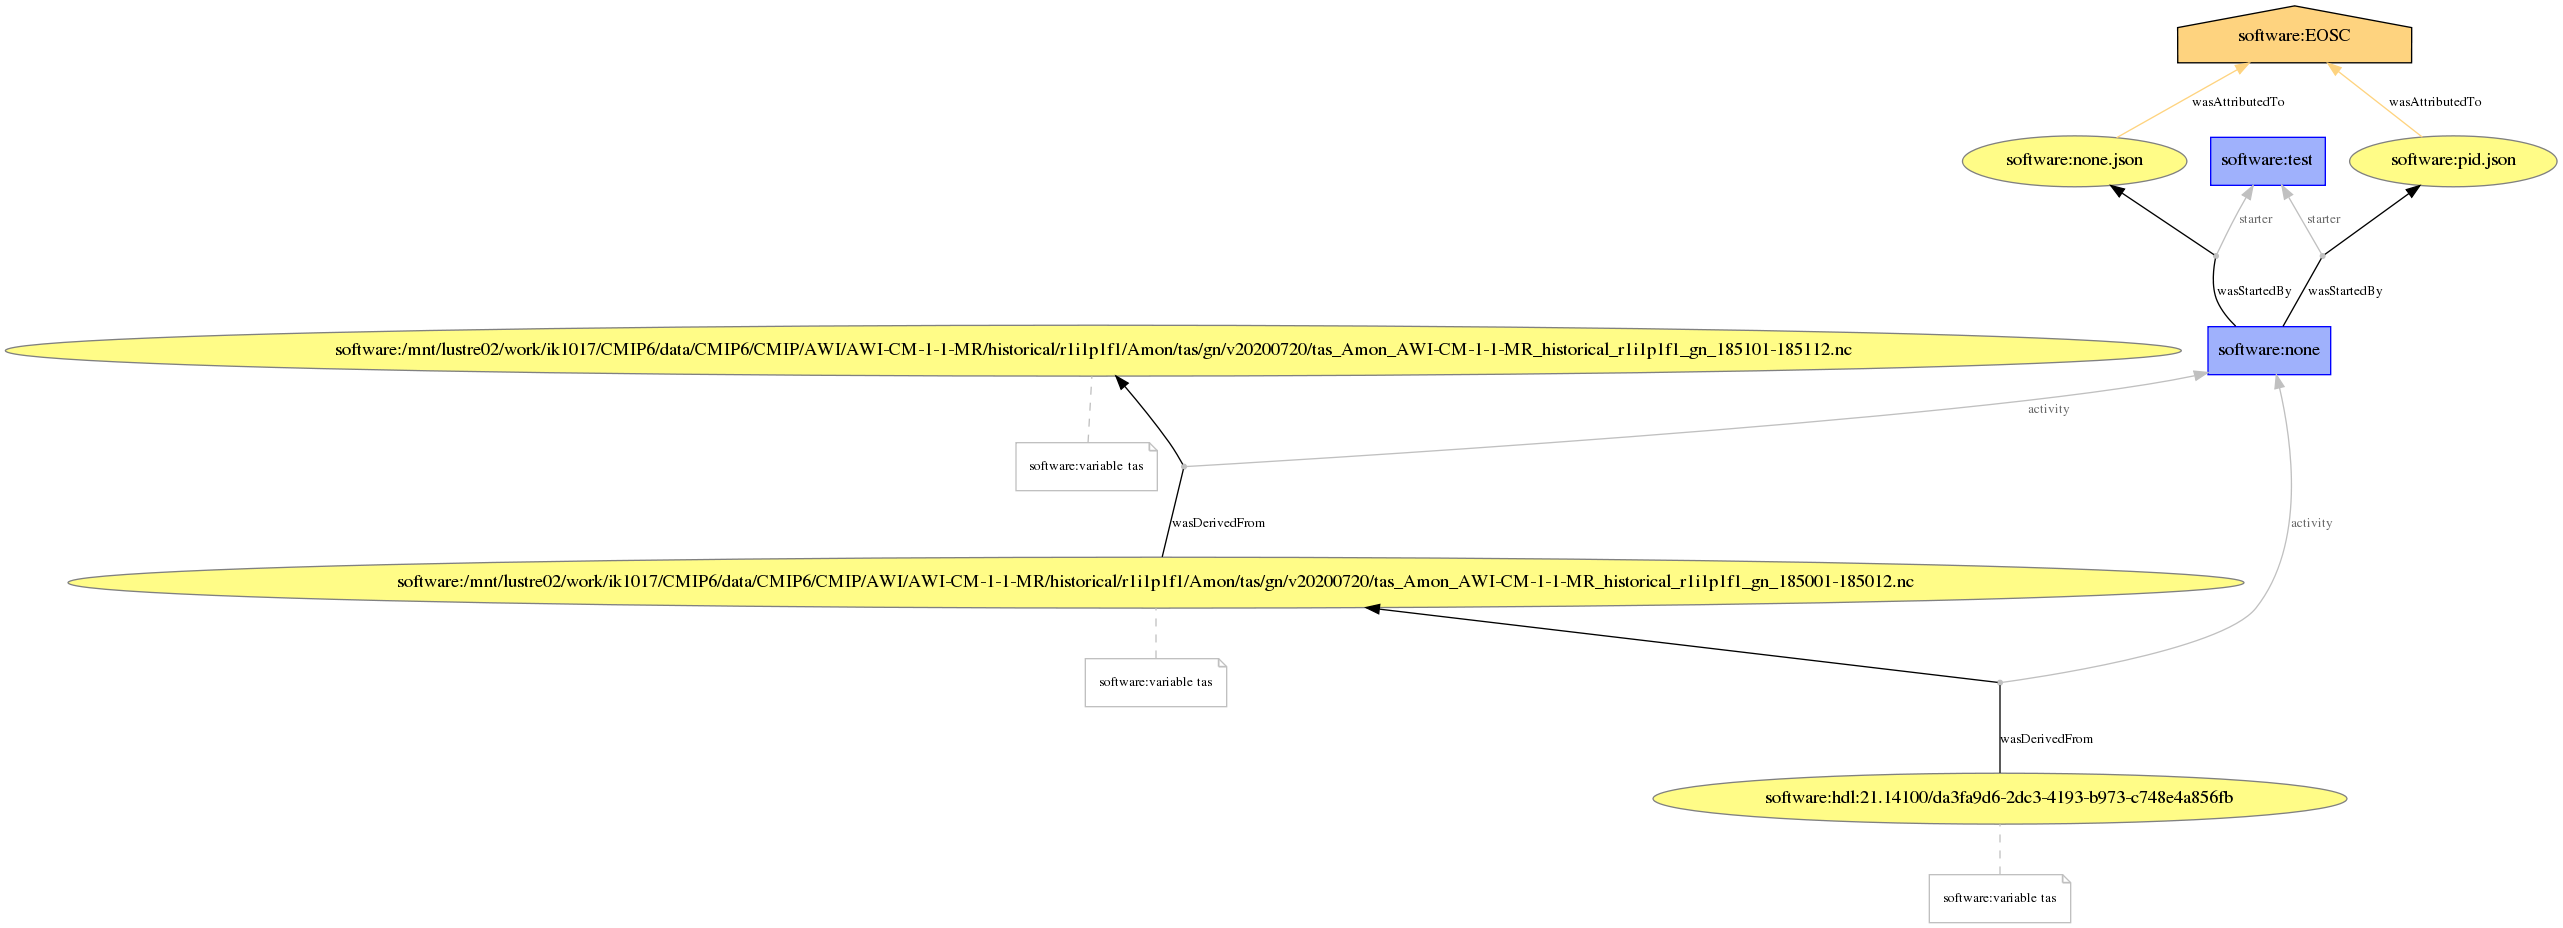

In [21]:
from IPython.display import Image
Image("test_prov.png")